## Q1: A

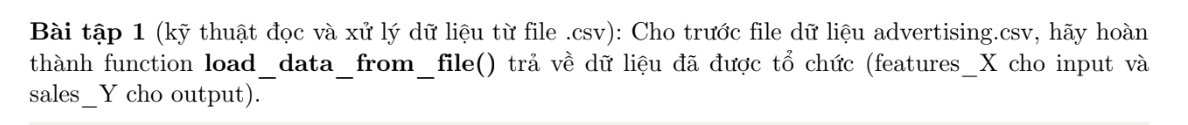

In [75]:
import numpy as np
import matplotlib . pyplot as plt
import random
random . seed (0) # please do not remove this line
def load_data_from_file (fileName = "advertising.csv") :
    data = np . genfromtxt (fileName , dtype = None , delimiter =',', skip_header =1)
    features_X = data [: , :3]
    sales_Y = data [: , 3]

    features_X = np.hstack([np.ones(shape=(len(features_X),1)), features_X])
    
    return features_X , sales_Y

## Q2, 3:

In [76]:
features_X , _ = load_data_from_file ()
print ( features_X [:5 ,:])

_ , sales_Y = load_data_from_file ()
print ( sales_Y . shape )

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]
(200,)


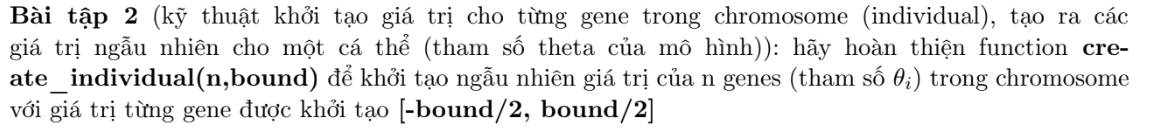

In [109]:
def create_individual ( n =4 , bound =10) :
    individual = [random . uniform (-bound/2 , bound/2) for _ in range ( n )]
    return individual

individual = create_individual ()
print ( individual )

[3.729625144634598, -1.694838727704603, -0.6432570960695925, -2.0728381858238087]


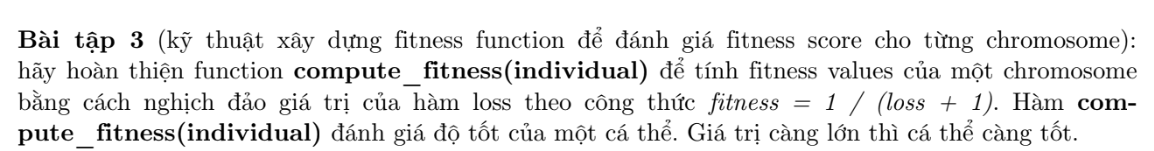

In [111]:
features_X , sales_Y = load_data_from_file ()
def compute_loss ( individual ) :
    theta = np . array ( individual )
    y_hat = features_X . dot ( theta )
    loss = (y_hat - sales_Y).T.dot( y_hat - sales_Y) / len(sales_Y)
    return loss

def compute_fitness ( individual ) :
    loss = compute_loss (individual)
    fitness_value = 1 / (1 + loss)
    return fitness_value

## Q4:

In [112]:
features_X , sales_Y = load_data_from_file ()
individual = [4.09 , 4.82 , 3.10 , 4.02]
fitness_score = compute_fitness ( individual )
print ( fitness_score )

1.0185991537088997e-06


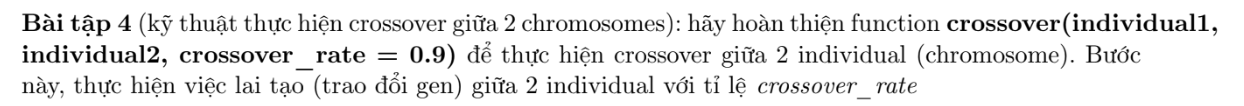

In [113]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    for i in range(len(individual1)):
        if np.random.rand() < crossover_rate: 
            individual1_new[i], individual2_new[i] = individual2_new[i], individual1_new[i]
    return individual1_new, individual2_new

## Q5:

In [114]:
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
individual1 , individual2 = crossover ( individual1 , individual2 , 2.0)
print (" individual1 : " , individual1 )
print (" individual2 : " , individual2 )

 individual1 :  [3.44, 2.57, -0.79, -2.41]
 individual2 :  [4.09, 4.82, 3.1, 4.02]


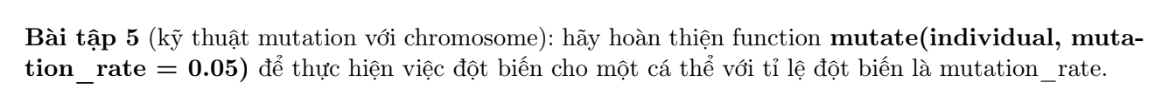

In [115]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()

    for i in range(len(individual)):
        if np.random.rand() < mutation_rate: 
            individual_m[i] = random.uniform(-10/2 , 10/2)
            
    return individual_m

## Q6:

In [116]:
before_individual = [4.09 , 4.82 , 3.10 , 4.02]
after_individual = mutate ( individual , mutation_rate = 2.0)
print ( before_individual == after_individual )

False


In [117]:
def initializePopulation ( m ) :
    population = [ create_individual () for _ in range ( m ) ]   
    return population

In [118]:
population = initializePopulation(100)
print(len(population))

100


In [86]:
def selection(sorted_old_population, m):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [121]:
population = initializePopulation(m=100)
individual_s = selection(population, m = 100)
print(individual_s)

[-4.435701990957894, -3.566182449623235, 4.335495676289549, -0.4378085289545428]


In [122]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen%1 == 0:
        print("Best loss:", compute_loss(sorted_population[m-1]), "with chromosome: ", sorted_population[m-1])

    new_population = []
    while len(new_population) < m-elitism:
        # selection
        individual1 = selection(sorted_population, m)
        individual2 = selection(sorted_population, m)
        
        # crossover
        individual1_new, individual2_new = crossover(individual1, individual2)
        # mutation
        individual1_new = mutate(individual1_new)
        individual2_new = mutate(individual2_new)

        new_population.append(individual1_new)
        new_population.append(individual2_new)

        # copy elitism chromosomes that have best fitness score to the next generation
    for ind in sorted_population[m-elitism:]:
        new_population.append(ind)


    return new_population, compute_loss(sorted_population[m-1])

## Q7:

In [124]:
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
old_population = [ individual1 , individual2 ]
new_population , _ = create_new_population ( old_population , elitism =2 , gen =1)

Best loss: 123415.05152880495 with chromosome:  [3.44, 2.57, -0.79, -2.41]


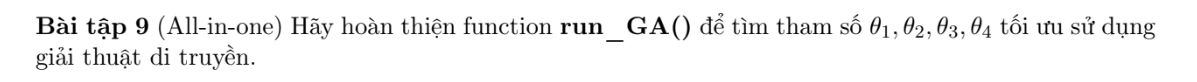

In [140]:
def run_GA():
  n_generations = 100
  m = 600
  features_X, sales_Y = load_data_from_file()
  population = initializePopulation(m)
  losses_list = []
  for i in range(n_generations):
    new_population , loss = create_new_population ( population , elitism =2 , gen =i+1)
    population = new_population
    losses_list.append(loss)
  return losses_list

In [142]:
losses_list = run_GA()

Best loss: 1984.2433198746103 with chromosome:  [-0.2497282521960278, 0.2954669145395128, -2.5244328795132107, 1.265304977680798]
Best loss: 1984.2433198746103 with chromosome:  [-0.2497282521960278, 0.2954669145395128, -2.5244328795132107, 1.265304977680798]
Best loss: 62.638109752410045 with chromosome:  [-4.434516802922221, 0.038054378371992215, 0.020249781467005512, 0.26475912162239457]
Best loss: 62.638109752410045 with chromosome:  [-4.434516802922221, 0.038054378371992215, 0.020249781467005512, 0.26475912162239457]
Best loss: 49.24558250341378 with chromosome:  [-3.0085267237500535, 0.038054378371992215, 0.020249781467005512, 0.26475912162239457]
Best loss: 49.24558250341378 with chromosome:  [-3.0085267237500535, 0.038054378371992215, 0.020249781467005512, 0.26475912162239457]
Best loss: 33.43719857099618 with chromosome:  [1.2086698131280746, 0.038054378371992215, 0.020249781467005512, 0.26475912162239457]
Best loss: 18.628928858453442 with chromosome:  [3.040610899055082, 0.0

Best loss: 357.5410963365817 with chromosome:  [4.820096192967851, 0.08334904355446948, 0.8485406851530177, -0.20142140920684604]
Best loss: 100.95598946972623 with chromosome:  [2.055221964117858, 0.08334904355446948, -0.3654488664061448, 0.0736998372442148]
Best loss: 69.63147152579387 with chromosome:  [2.055221964117858, 0.08334904355446948, -0.3654488664061448, 0.16819456311849557]
Best loss: 69.63147152579387 with chromosome:  [2.055221964117858, 0.08334904355446948, -0.3654488664061448, 0.16819456311849557]
Best loss: 69.63147152579387 with chromosome:  [2.055221964117858, 0.08334904355446948, -0.3654488664061448, 0.16819456311849557]
Best loss: 69.63147152579387 with chromosome:  [2.055221964117858, 0.08334904355446948, -0.3654488664061448, 0.16819456311849557]
Best loss: 69.63147152579387 with chromosome:  [2.055221964117858, 0.08334904355446948, -0.3654488664061448, 0.16819456311849557]
Best loss: 41.17378737640002 with chromosome:  [1.487908231669362, 0.03182363861268023, 0.

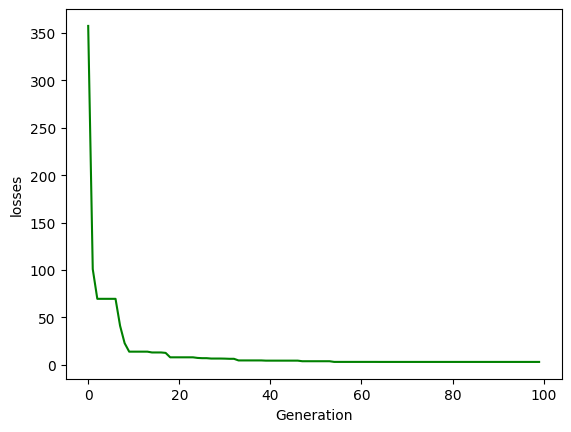

In [146]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):
    plt.plot(losses_list, color='green')
    plt.xlabel('Generation')
    plt.ylabel('losses')


losses_list = run_GA()
visualize_loss(losses_list)

[3.5156870013234673, 0.5134149845435685, -1.7608621416120176, 1.0269418546326552]


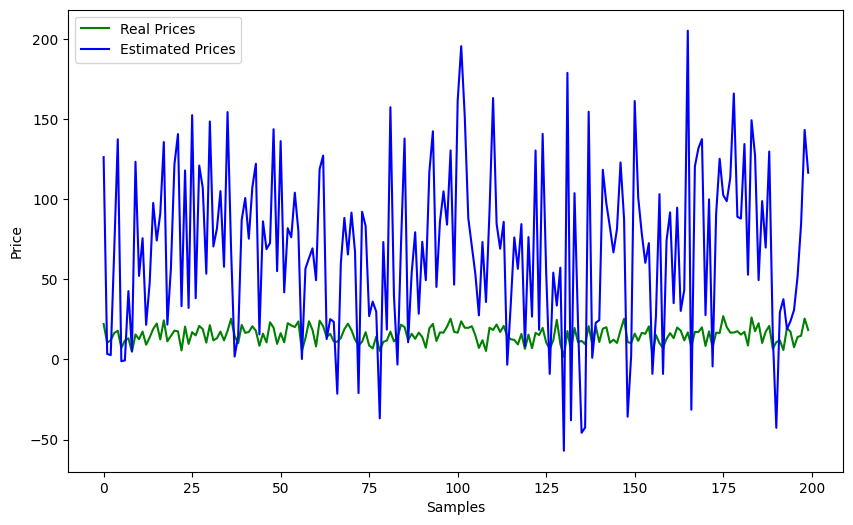

In [149]:
def visualize_predict_gt():
  # visualization of ground truth and predict value
  sorted_population = sorted(population, key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])

  estimated_prices = []
  for feature in features_X:
    estimated_prices.append(feature.dot(theta))
    
  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_Y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()

visualize_predict_gt()

[3.5156870013234673, 0.5134149845435685, -1.7608621416120176, 1.0269418546326552]


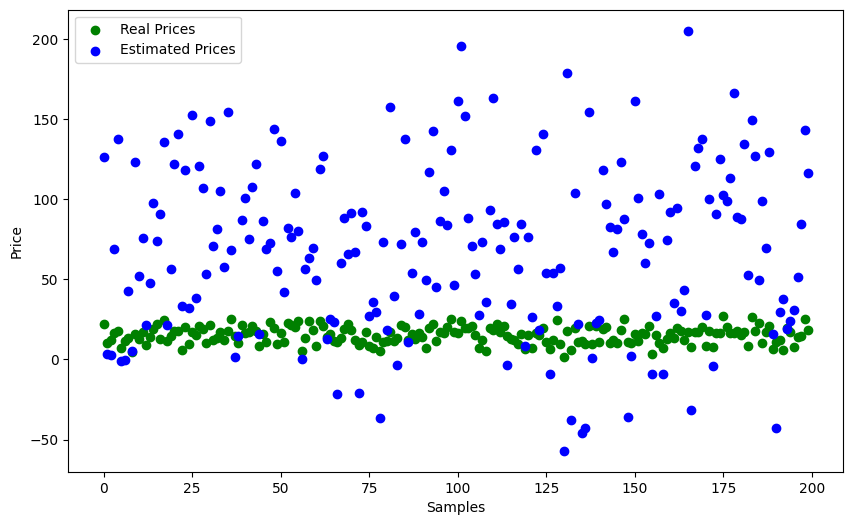

In [136]:
# visualization of ground truth and predict value
sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[-1])
theta = np.array(sorted_population[-1])

estimated_prices = []
samples = [i for i in range(len(features_X))]
for feature in features_X:
    estimated_price = sum(c*x for x, c in zip(feature, theta))
    estimated_prices.append(estimated_price)
fig, ax = plt.subplots(figsize=(10, 6))
# plt.plot(prices, c='green')
# plt.plot(estimated_prices, c='red')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.scatter(samples, sales_Y, c='green', label='Real Prices')
plt.scatter(samples, estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()